# **Understanding Energy Consumption: Patterns and Predictive Modeling**


<h4>TEAM </h4>
<h5>Laxmikanth Reddy Jitta</h5>
<h5>Laxmi Priya Kotha</h5> 
<h5>Likitha Reddy Kotla </h5>
<h5>Siddardh Reddy Garlapati</h5>

### IMPORTING PACKAGES 

In [31]:
# Importing Pandas package

import pandas as pd

In [32]:
# Read .csv file using pandas and look at first five rows

df = pd.read_csv("C:\\Users\\HP\\Downloads\\Global_Data_.csv")
df.head(21)

,Entity,Year,Access_to_electricity_(% of population),Access_to_clean_fuels_for_cooking,Renewable_electricity_generating_capacity_per_capita,Financial_flows_to_developing_countries(US $),Renewable_energy_share_in_the_total_final_energy_consumption (%),Electricity_from_fossil_fuels(TWh),Electricity_from_nuclear(TWh),Electricity_from_renewables(TWh),...,Primary_energy_consumption_per_capita(kWh/person),Energy_intensity_level_of_primary_energy(MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables(% equivalent primary energy),gdp_growth,gdp_per_capita,Density(P/Km2),Land_Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,...,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,...,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,...,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,60,652230.0,33.93911,67.709953
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,...,607.83350,1.94,3559.999943,NaN,3.924984,364.663542,60,652230.0,33.93911,67.709953
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,...,975.04816,2.25,4880.000114,NaN,21.390528,437.268740,60,652230.0,33.93911,67.709953


### METADATA OF THE DATAFRAME

In [33]:
# Using shape method on the dataframe

df.shape

(3649, 21)

In [34]:
# Using info method on the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access_to_electricity_(% of population)                           3639 non-null   float64
 3   Access_to_clean_fuels_for_cooking                                 3480 non-null   float64
 4   Renewable_electricity_generating_capacity_per_capita              2718 non-null   float64
 5   Financial_flows_to_developing_countries(US $)                     1560 non-null   float64
 6   Renewable_energy_share_in_the_total_final_energy_consumption (%)  3455 non-null   float64
 7   Electricity_from_fossil_fuels(TWh

### DATA PREPROCESSING 

### CHANGE COLUMN DATATYPE

In [35]:
# Change datatype of Density Column 

df['Density(P/Km2)'] = df['Density(P/Km2)'].astype(str).str.replace(',', '')

df['Density(P/Km2)'] = pd.to_numeric(df['Density(P/Km2)'], errors='coerce')

df['Density(P/Km2)'] = df['Density(P/Km2)'].astype('Int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access_to_electricity_(% of population)                           3639 non-null   float64
 3   Access_to_clean_fuels_for_cooking                                 3480 non-null   float64
 4   Renewable_electricity_generating_capacity_per_capita              2718 non-null   float64
 5   Financial_flows_to_developing_countries(US $)                     1560 non-null   float64
 6   Renewable_energy_share_in_the_total_final_energy_consumption (%)  3455 non-null   float64
 7   Electricity_from_fossil_fuels(TWh

### NULL VALUE HANDLING 

In [36]:
# Checking for null values in the dataframe

print(df.isna().sum())

Entity                                                                 0
Year                                                                   0
Access_to_electricity_(% of population)                               10
Access_to_clean_fuels_for_cooking                                    169
Renewable_electricity_generating_capacity_per_capita                 931
Financial_flows_to_developing_countries(US $)                       2089
Renewable_energy_share_in_the_total_final_energy_consumption (%)     194
Electricity_from_fossil_fuels(TWh)                                    21
Electricity_from_nuclear(TWh)                                        126
Electricity_from_renewables(TWh)                                      21
Low_carbon_electricity(% electricity)                                 42
Primary_energy_consumption_per_capita(kWh/person)                      0
Energy_intensity_level_of_primary_energy(MJ/$2017 PPP GDP)           207
Value_co2_emissions_kt_by_country                  

In [37]:
# Columns with many null values are dropped 

df.columns = df.columns.str.strip()

columns_to_drop = ['Renewables(% equivalent primary energy)', 'Financial_flows_to_developing_countries(US $)', 'Renewable_electricity_generating_capacity_per_capita']

# Check if columns exist before dropping
for col in columns_to_drop:
    if col in df.columns:
        try:
            df = df.drop(columns=col)
            print(f"Dropped column: {col}")
        except KeyError:
            print(f"Error: Column {col} not found in DataFrame.")
    else:
        print(f"Column {col} not found in DataFrame.")

Dropped column: Renewables(% equivalent primary energy)
Dropped column: Financial_flows_to_developing_countries(US $)
Dropped column: Renewable_electricity_generating_capacity_per_capita


In [38]:
# Columns with minimal null values are filled with mean values

columns_to_fill = [
    'Access_to_clean_fuels_for_cooking',
    'Renewable_energy_share_in_the_total_final_energy_consumption (%)',
    'Electricity_from_nuclear(TWh)',
    'Energy_intensity_level_of_primary_energy(MJ/$2017 PPP GDP)',
    'Value_co2_emissions_kt_by_country',
    'gdp_growth',
    'gdp_per_capita'
]
df[columns_to_fill] = df[columns_to_fill].apply(lambda x: x.fillna(x.mean()))

df.isna().sum()

Entity                                                               0
Year                                                                 0
Access_to_electricity_(% of population)                             10
Access_to_clean_fuels_for_cooking                                    0
Renewable_energy_share_in_the_total_final_energy_consumption (%)     0
Electricity_from_fossil_fuels(TWh)                                  21
Electricity_from_nuclear(TWh)                                        0
Electricity_from_renewables(TWh)                                    21
Low_carbon_electricity(% electricity)                               42
Primary_energy_consumption_per_capita(kWh/person)                    0
Energy_intensity_level_of_primary_energy(MJ/$2017 PPP GDP)           0
Value_co2_emissions_kt_by_country                                    0
gdp_growth                                                           0
gdp_per_capita                                                       0
Densit

In [39]:
# Dropping remaining rows with null values

df = df.dropna()

### DUPLICATE ROW VERIFICATION

In [40]:
# Duplicate rows verification

num_duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


In [41]:
# Dataframe after null value and duplicate row verification

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3597 entries, 0 to 3648
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3597 non-null   object 
 1   Year                                                              3597 non-null   int64  
 2   Access_to_electricity_(% of population)                           3597 non-null   float64
 3   Access_to_clean_fuels_for_cooking                                 3597 non-null   float64
 4   Renewable_energy_share_in_the_total_final_energy_consumption (%)  3597 non-null   float64
 5   Electricity_from_fossil_fuels(TWh)                                3597 non-null   float64
 6   Electricity_from_nuclear(TWh)                                     3597 non-null   float64
 7   Electricity_from_renewables(TWh)      

In [42]:
# Dataframe after null value and duplicate row verification

df.isna().sum()

Entity                                                              0
Year                                                                0
Access_to_electricity_(% of population)                             0
Access_to_clean_fuels_for_cooking                                   0
Renewable_energy_share_in_the_total_final_energy_consumption (%)    0
Electricity_from_fossil_fuels(TWh)                                  0
Electricity_from_nuclear(TWh)                                       0
Electricity_from_renewables(TWh)                                    0
Low_carbon_electricity(% electricity)                               0
Primary_energy_consumption_per_capita(kWh/person)                   0
Energy_intensity_level_of_primary_energy(MJ/$2017 PPP GDP)          0
Value_co2_emissions_kt_by_country                                   0
gdp_growth                                                          0
gdp_per_capita                                                      0
Density(P/Km2)      

### MULTIVARIATE ANALYSIS

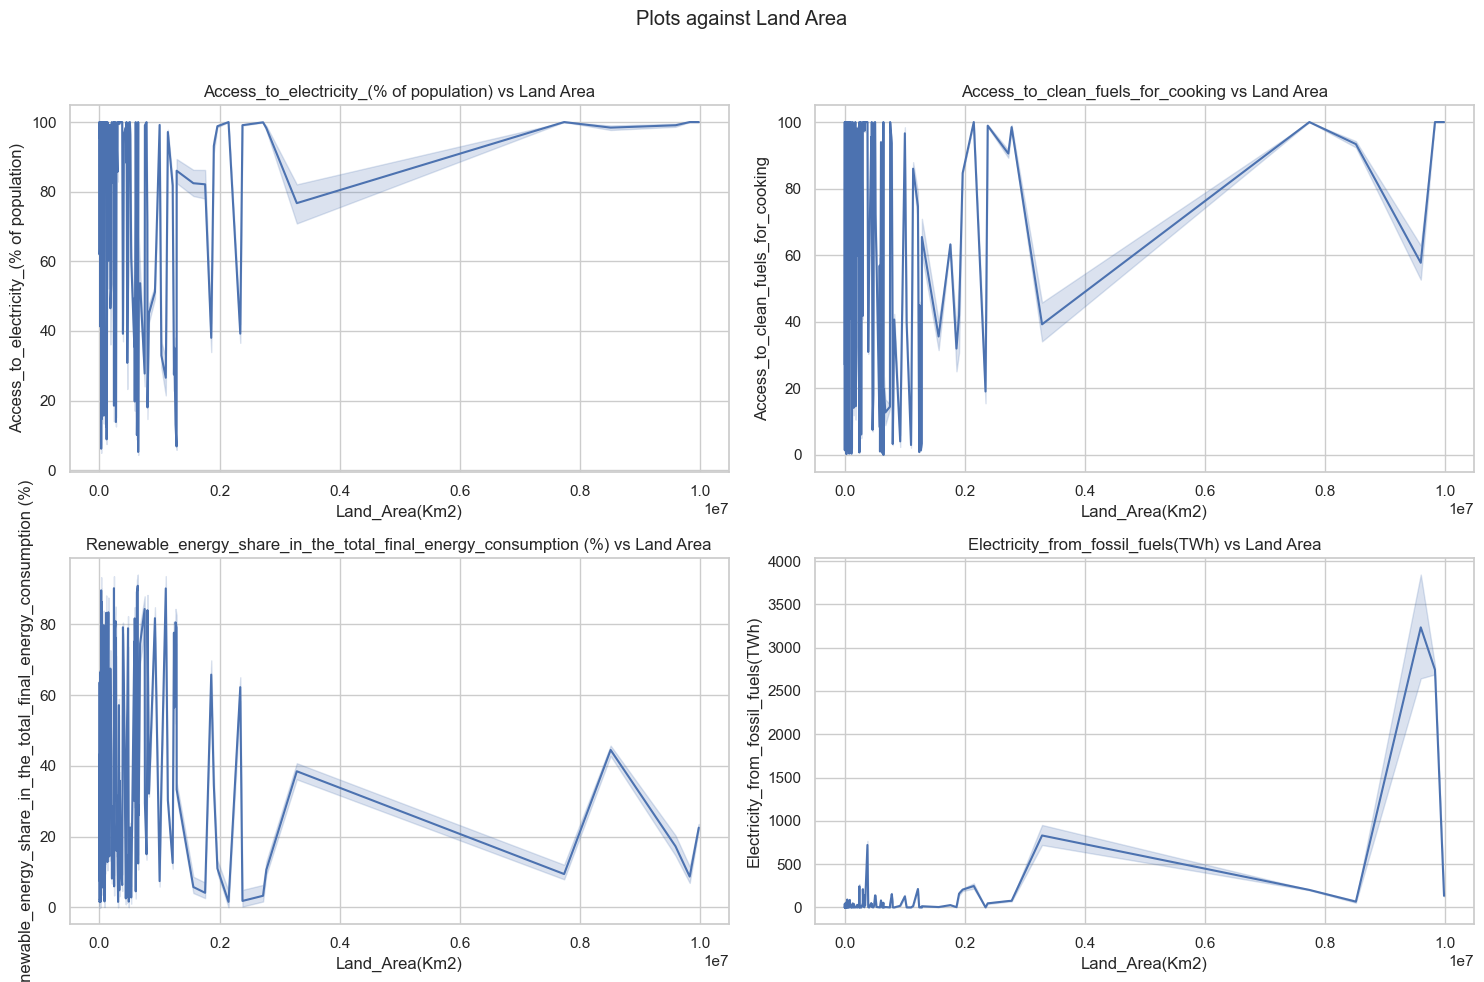

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot against Land_Area and gdp_per_capita
columns_to_plot = [
    'Access_to_electricity_(% of population)',
    'Access_to_clean_fuels_for_cooking',
    'Renewable_energy_share_in_the_total_final_energy_consumption (%)',
    'Electricity_from_fossil_fuels(TWh)'
]

# Plotting against Land_Area
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Plots against Land Area')

for i, col in enumerate(columns_to_plot):
    sns.lineplot(data=df, x='Land_Area(Km2)', y=col, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'{col} vs Land Area')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### SCATTER PLOT: ACCESS TO ELECTRICITY VS. RENEWABLE ENERGY SHARE

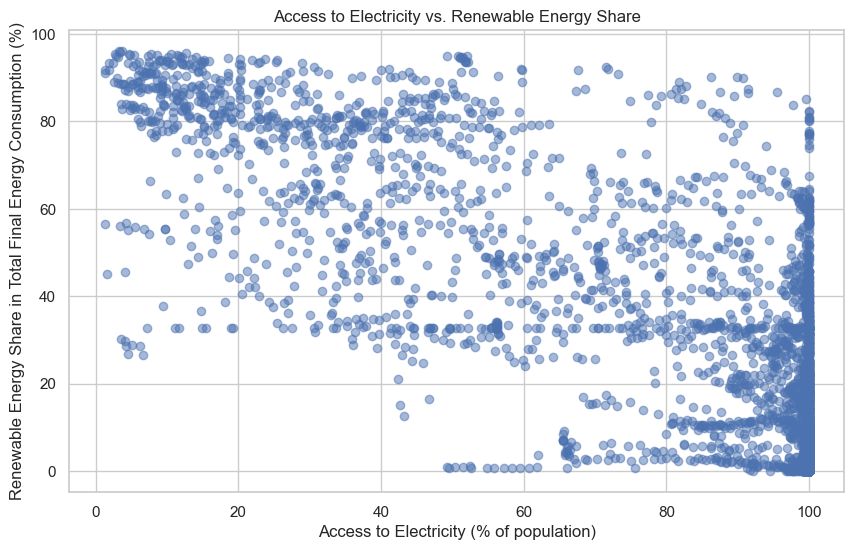

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting Access to Electricity vs. Renewable Energy Share
plt.figure(figsize=(10, 6))
plt.scatter(df['Access_to_electricity_(% of population)'], df['Renewable_energy_share_in_the_total_final_energy_consumption (%)'], alpha=0.5)
plt.title('Access to Electricity vs. Renewable Energy Share')
plt.xlabel('Access to Electricity (% of population)')
plt.ylabel('Renewable Energy Share in Total Final Energy Consumption (%)')
plt.grid(True)
plt.show()

### CO2 EMISSIONS VS. GDP GROWTH

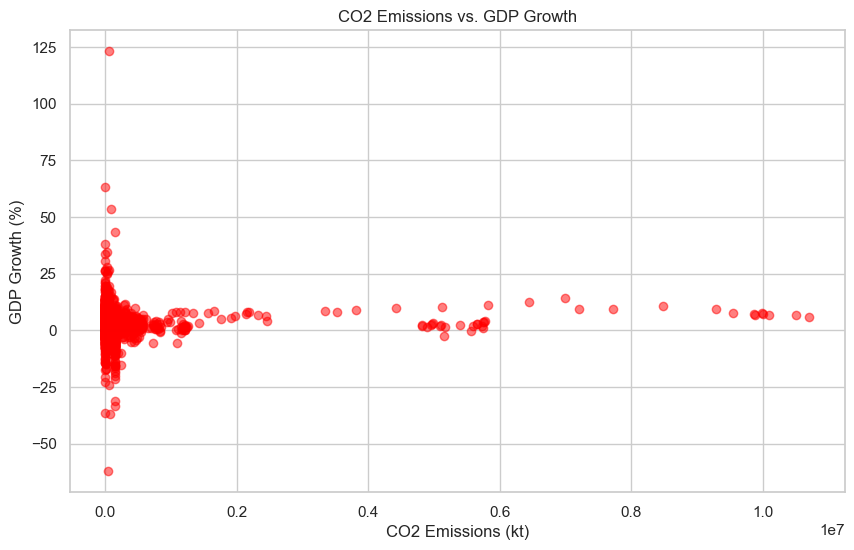

In [45]:
# Plotting CO2 Emissions vs. GDP Growth

plt.figure(figsize=(10, 6))
plt.scatter(df['Value_co2_emissions_kt_by_country'], df['gdp_growth'], alpha=0.5, color='red')
plt.title('CO2 Emissions vs. GDP Growth')
plt.xlabel('CO2 Emissions (kt)')
plt.ylabel('GDP Growth (%)')
plt.grid(True)
plt.show()

### DYNAMIC MAP 

In [46]:
import pandas as pd
import plotly.graph_objects as go

# List of African countries (you can modify this list as needed)
african_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon',
    'Central African Republic', 'Chad', 'Comoros', 'Congo, Democratic Republic of the', 'Congo, Republic of the',
    'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
    'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
    'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
    'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Uganda',
    'Zambia', 'Zimbabwe'
]

In [47]:
# Function to plot features on the African map

def plot_africa_map(column_name):
    fig = go.Figure()

    # Iterate over each year from 2000 to 2020
    for year in range(2000, 2021):
        # Filter the data for the current year and African countries
        filtered_df = df[(df['Year'] == year) & (df['Entity'].isin(african_countries))]

        # Create a choropleth trace for the current year
        trace = go.Choropleth(
            locations=filtered_df['Entity'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Plasma',  # Use a different color scale for better contrast
            colorbar=dict(title='', x=0.95, y=0.59, len=0.65, thickness=10),
            zmin=df[column_name].min(),
            zmax=df[column_name].max(),
            visible=False  # Set the trace to invisible initially
        )

        # Add the trace to the figure
        fig.add_trace(trace)

    # Set the first trace to visible
    fig.data[0].visible = True

    # Create animation steps
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},  # Set all traces to invisible
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)  # Set the label for each step
        )
        step['args'][0]['visible'][i] = True  # Set the current trace to visible
        steps.append(step)

    # Create the slider
    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},  # Increase font size for slider label
    )]

    # Update the layout of the figure with increased size and change the template
    fig.update_layout(
        title_text='Access to Electricity in African Countries',  # Set the initial title
        title_font_size=24,  # Increase title font size
        title_x=0.5,  # Center the title
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth',
            resolution=50,
            scope='africa',  # Focus on Africa
        ),
        sliders=sliders,
        height=500,  # Set the height of the figure in pixels
        width=1000,  # Set the width of the figure in pixels
        font=dict(family='Arial', size=12),  # Customize font family and size for the whole figure
        margin=dict(t=80, l=50, r=50, b=50),  # Add margin for better layout spacing
        template='plotly_dark',  # Change the template to 'plotly_dark'
    )

    # Show the figure
    fig.show()

In [48]:
# Map

column_name = 'Access_to_electricity_(% of population)'
plot_africa_map(column_name)

### CO2 EMISSIONS

In [49]:
# CO2 Emissions for various countries

import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Ensure numeric columns are in the correct format
numeric_cols = [
    'Electricity_from_fossil_fuels(TWh)', 'Electricity_from_nuclear(TWh)',
    'Electricity_from_renewables(TWh)', 'Value_co2_emissions_kt_by_country'
]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Global Sustainable Energy Trends Dashboard"),
   
    # Dropdown for selecting country
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in df['Entity'].unique()],
        value='World',  # Default selection
        clearable=False,
        style={'width': '50%'}
    ),
   
    # Line chart for time series
    dcc.Graph(id='time-series-plot'),
   
    # Choropleth map
    dcc.Graph(id='choropleth-map')
])

# Callback to update time series plot based on selected country
@app.callback(
    Output('time-series-plot', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_time_series(country):
    filtered_df = df[df['Entity'] == country]
    fig = px.line(filtered_df, x='Year', y='Value_co2_emissions_kt_by_country',
                  title=f'CO2 Emissions in {country}', template='plotly_dark')
    return fig

# Callback to update choropleth map based on selected year
@app.callback(
    Output('choropleth-map', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_choropleth_map(country):
    fig = px.choropleth(df, locations='Entity', locationmode='country names',
                        color='Value_co2_emissions_kt_by_country', hover_name='Entity',
                        title=f'CO2 Emissions by Country', template='plotly_dark')
    return fig

# Run the Dash app on a different port
if __name__ == '__main__':
    app.run_server(debug=True, port=8052)

### CORRELATION MATRIX 

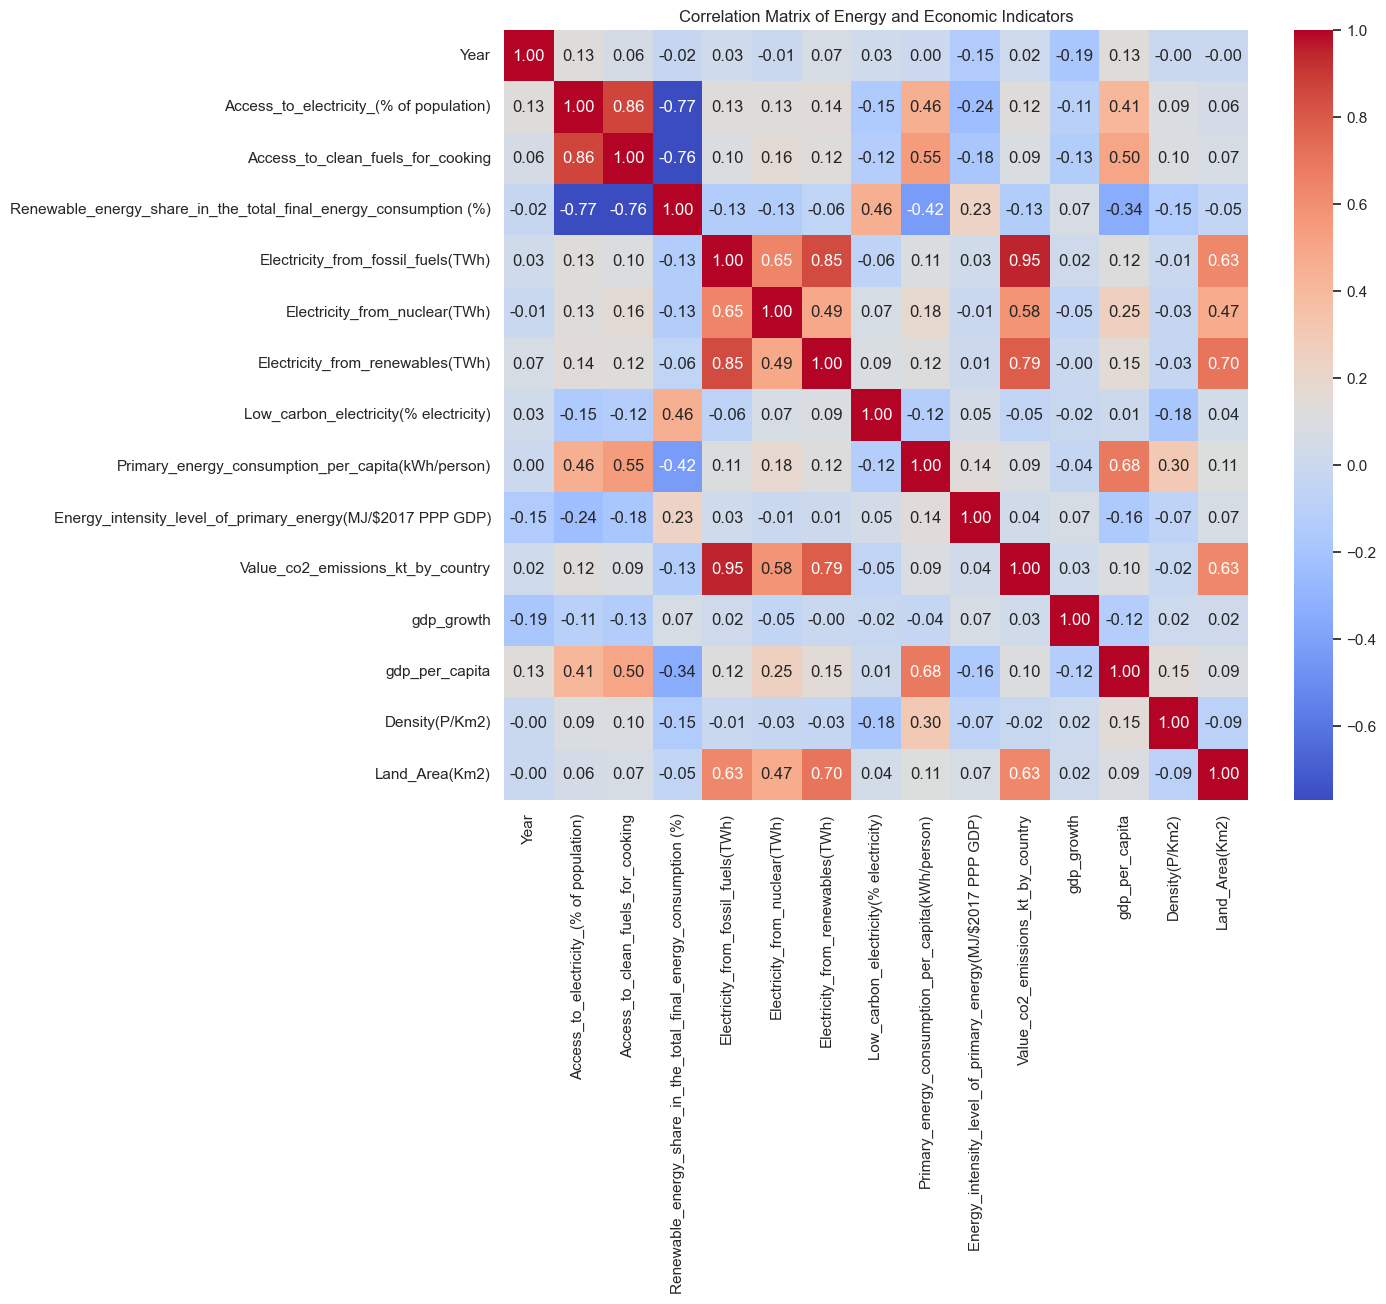

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
columns_to_exclude = ['Latitude', 'Longitude']

# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=columns_to_exclude)

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Energy and Economic Indicators')
plt.show()

### GRAPHS DEPECTING CORRELATIONS

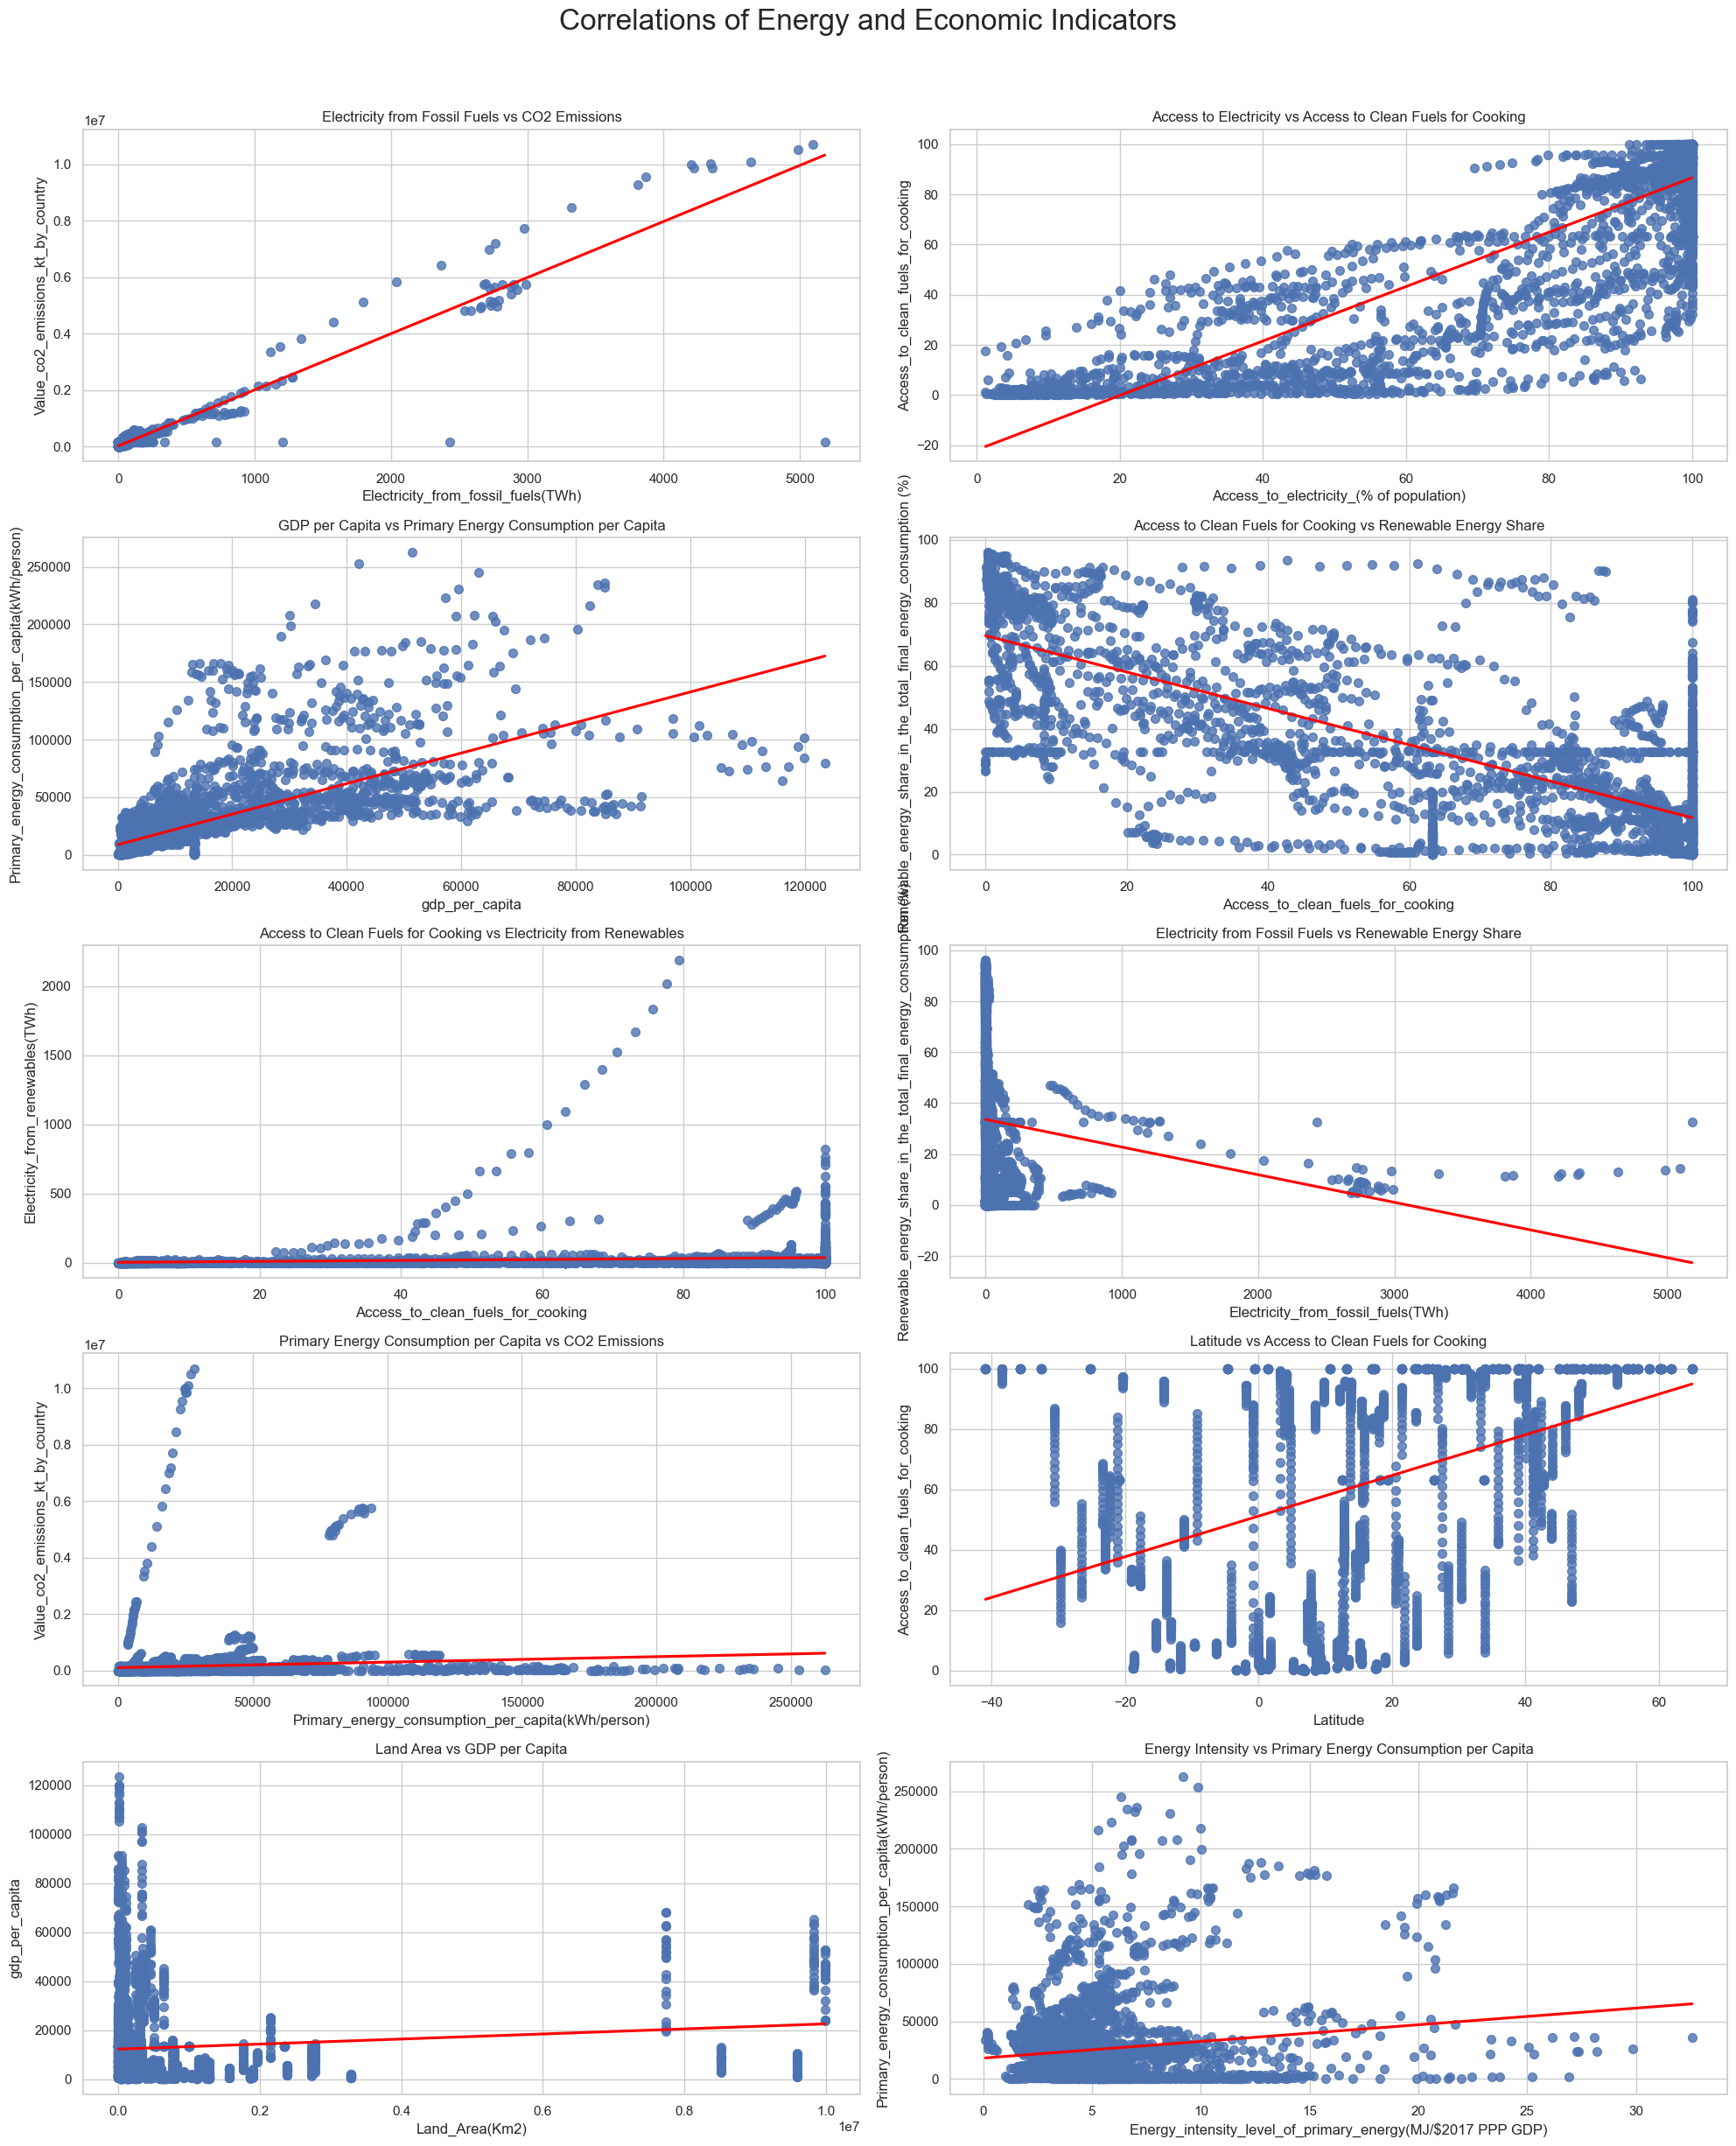

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is  DataFrame
# Setting the style for the plots
sns.set(style="whitegrid")

# Creating subplots
fig, axs = plt.subplots(5, 2, figsize=(20, 25))
fig.suptitle('Correlations of Energy and Economic Indicators', fontsize=24)

# High Positive Correlations
sns.regplot(x='Electricity_from_fossil_fuels(TWh)', y='Value_co2_emissions_kt_by_country', data=df, scatter_kws={'s':50}, line_kws={'color':'red'}, ci=None, ax=axs[0, 0])
axs[0, 0].set_title('Electricity from Fossil Fuels vs CO2 Emissions')

sns.regplot(x='Access_to_electricity_(% of population)', y='Access_to_clean_fuels_for_cooking', data=df, scatter_kws={'s':50}, line_kws={'color':'red'}, ci=None, ax=axs[0, 1])
axs[0, 1].set_title('Access to Electricity vs Access to Clean Fuels for Cooking')

sns.regplot(x='gdp_per_capita', y='Primary_energy_consumption_per_capita(kWh/person)', data=df, scatter_kws={'s':50}, line_kws={'color':'red'}, ci=None, ax=axs[1, 0])
axs[1, 0].set_title('GDP per Capita vs Primary Energy Consumption per Capita')

# High Negative Correlations
sns.regplot(x='Access_to_clean_fuels_for_cooking', y='Renewable_energy_share_in_the_total_final_energy_consumption (%)', data=df, scatter_kws={'s':50}, line_kws={'color':'red'}, ci=None, ax=axs[1, 1])
axs[1, 1].set_title('Access to Clean Fuels for Cooking vs Renewable Energy Share')

sns.regplot(x='Access_to_clean_fuels_for_cooking', y='Electricity_from_renewables(TWh)', data=df, scatter_kws={'s':50}, line_kws={'color':'red'}, ci=None, ax=axs[2, 0])
axs[2, 0].set_title('Access to Clean Fuels for Cooking vs Electricity from Renewables')

sns.regplot(x='Electricity_from_fossil_fuels(TWh)', y='Renewable_energy_share_in_the_total_final_energy_consumption (%)', data=df, scatter_kws={'s':50}, line_kws={'color':'red'}, ci=None, ax=axs[2, 1])
axs[2, 1].set_title('Electricity from Fossil Fuels vs Renewable Energy Share')

# Other Notable Correlations
sns.regplot(x='Primary_energy_consumption_per_capita(kWh/person)', y='Value_co2_emissions_kt_by_country', data=df, scatter_kws={'s':50}, line_kws={'color':'red'}, ci=None, ax=axs[3, 0])
axs[3, 0].set_title('Primary Energy Consumption per Capita vs CO2 Emissions')

sns.regplot(x='Latitude', y='Access_to_clean_fuels_for_cooking', data=df, scatter_kws={'s':50}, line_kws={'color':'red'}, ci=None, ax=axs[3, 1])
axs[3, 1].set_title('Latitude vs Access to Clean Fuels for Cooking')

sns.regplot(x='Land_Area(Km2)', y='gdp_per_capita', data=df, scatter_kws={'s':50}, line_kws={'color':'red'}, ci=None, ax=axs[4, 0])
axs[4, 0].set_title('Land Area vs GDP per Capita')

sns.regplot(x='Energy_intensity_level_of_primary_energy(MJ/$2017 PPP GDP)', y='Primary_energy_consumption_per_capita(kWh/person)', data=df, scatter_kws={'s':50}, line_kws={'color':'red'}, ci=None, ax=axs[4, 1])
axs[4, 1].set_title('Energy Intensity vs Primary Energy Consumption per Capita')

# Adjusting layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### PREDICTING ENERGY CONSUMPTION 

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


# List of numerical columns for imputation and modeling
numerical_columns = [
    'Access_to_electricity_(% of population)',
    'Access_to_clean_fuels_for_cooking',
    'Renewable_energy_share_in_the_total_final_energy_consumption (%)',
    'Electricity_from_fossil_fuels(TWh)',
    'Electricity_from_nuclear(TWh)',
    'Electricity_from_renewables(TWh)',
    'Low_carbon_electricity(% electricity)',
    'Primary_energy_consumption_per_capita(kWh/person)',
    'Energy_intensity_level_of_primary_energy(MJ/$2017 PPP GDP)',
    'Value_co2_emissions_kt_by_country',
    'gdp_growth',
    'gdp_per_capita',
    'Density(P/Km2)',
    'Land_Area(Km2)',
    'Latitude',
    'Longitude'
]

# Separate numerical columns and non-numerical columns
try:
    numerical_df = df[numerical_columns]
except KeyError as e:
    print(f"KeyError: {e}. Please check the column names in your DataFrame.")
    raise

# Impute missing values with the mean for numerical columns
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(numerical_df), columns=numerical_df.columns)

# Separate features (X) and target variable (y)
X = df_imputed.drop(columns=['Primary_energy_consumption_per_capita(kWh/person)'])
y = df_imputed['Primary_energy_consumption_per_capita(kWh/person)']

### EVALUATING MODEL PERFORMANCE

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'Ada Boosting': AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'Support Vector': SVR(kernel='rbf'),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
}

results = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store results
    results[name] = {
        'R2 Score': r2,
        'Adjusted R2 Score': adj_r2,
        'Mean Absolute Error (MAE)': mae,
        'Root Mean Squared Error (RMSE)': rmse,
        'Predictions': pd.DataFrame({'Actual Energy Consumption': y_test, 'Predicted Energy Consumption': y_pred}).reset_index()
    }

# Print results in the desired format
for name, result in results.items():
    print(f"{name}:\n")
    print(f"R2 Score: {result['R2 Score']:.3f}")
    print(f"Adjusted R2 Score: {result['Adjusted R2 Score']:.3f}")
    print(f"Mean Absolute Error (MAE): {result['Mean Absolute Error (MAE)']:.3f}")
    print(f"Root Mean Squared Error (RMSE): {result['Root Mean Squared Error (RMSE)']:.3f}\n")
    print(result['Predictions'].head())
    print("----------------------------------------\n")

# Determine the best performing model based on R2 Score
best_model = max(results, key=lambda x: results[x]['R2 Score'])
print(f"The best performing model is: {best_model} with R2 Score: {results[best_model]['R2 Score']:.3f}")


Gradient Boosting:

R2 Score: 0.964
Adjusted R2 Score: 0.964
Mean Absolute Error (MAE): 3708.472
Root Mean Squared Error (RMSE): 6898.599

   index  Actual Energy Consumption  Predicted Energy Consumption
0   3070                  747.48596                   3083.345559
1   1255                19119.28300                  14333.003965
2   3247                  939.68665                    895.243168
3   1061                  655.35320                   1498.432037
4   1717                43320.58000                  38766.435334
----------------------------------------

Ada Boosting:

R2 Score: 0.865
Adjusted R2 Score: 0.863
Mean Absolute Error (MAE): 9091.661
Root Mean Squared Error (RMSE): 13417.416

   index  Actual Energy Consumption  Predicted Energy Consumption
0   3070                  747.48596                   4414.875153
1   1255                19119.28300                  19596.145139
2   3247                  939.68665                   4160.437486
3   1061                

### MODEL PERFORMANCE GRAPH

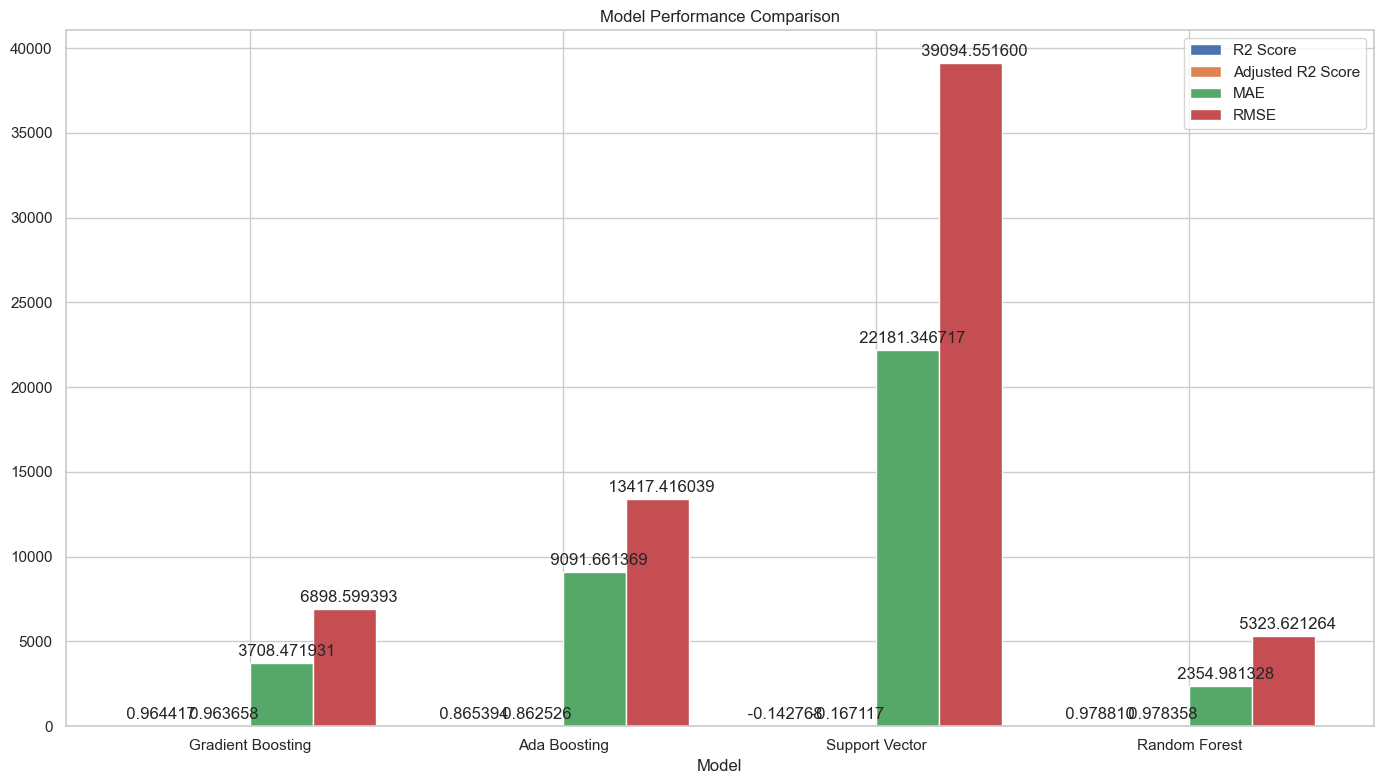

In [60]:
import matplotlib.pyplot as plt 
import numpy as np

# Model names
model_names = list(results. keys())

# Performance metrics
r2_scores = [results[name]['R2 Score'] for name in model_names]
adj_r2_scores = [results[name]['Adjusted R2 Score'] for name in model_names]
mae_scores = [results[name]['Mean Absolute Error (MAE)'] for name in model_names]
rmse_scores = [results[name]['Root Mean Squared Error (RMSE)'] for name in model_names]

# Set up the bar graph
x = np.arange (len (model_names)) # the Label Locations
width = 0.2 # the width of the bars
fig, ax = plt.subplots(figsize= (14, 8))
rects1 = ax. bar (x - 1.5*width, r2_scores, width, label= 'R2 Score')
rects2 = ax. bar (x - 0.5*width, adj_r2_scores, width, label='Adjusted R2 Score')
rects3 = ax. bar (x + 0.5*width, mae_scores, width, label= 'MAE')
rects4 = ax.bar (x + 1.5*width, rmse_scores, width, label= 'RMSE')

# Add some text for labels, title, and custom x-axis tick Labels, etc.
ax.set_xlabel ( 'Model')
ax.set_title( 'Model Performance Comparison')
ax.set_xticks (x)
ax.set_xticklabels(model_names)
ax.legend()

# Add data Labels
def add_labels (rects) : 
    for rect in rects:
        height = rect. get_height()
        ax. annotate(f' {height: 2f}',
                    xy= (rect. get_x() + rect. get_width() / 2, height), 
                    xytext=(0, 3), # 3 points vertical offset 
                    textcoords="offset points", 
                    ha= 'center', va= 'bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

fig.tight_layout()

plt.show()